In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.image import imread
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [47]:
img = imread('perlin/images/perlin1.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
img.shape

(2400, 2400)

### RGB

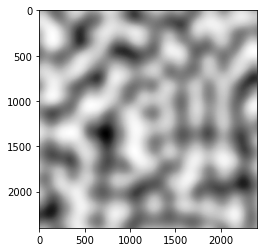

In [48]:
plt.imshow(img, cmap='Greys')

### HSI

In [4]:
# hue = np.random.rand() * 2 * np.pi * np.ones(img.shape)
hue = 0 * np.ones(img.shape)
hue

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
intensity = img / 255
intensity

array([[0.50980392, 0.49803922, 0.47843137, ..., 0.75686275, 0.76470588,
        0.77254902],
       [0.51372549, 0.49803922, 0.47843137, ..., 0.75294118, 0.76078431,
        0.77254902],
       [0.51372549, 0.50196078, 0.48235294, ..., 0.75294118, 0.76078431,
        0.76862745],
       ...,
       [0.74901961, 0.74901961, 0.74509804, ..., 0.19215686, 0.19607843,
        0.19607843],
       [0.74901961, 0.74901961, 0.74509804, ..., 0.19607843, 0.19607843,
        0.2       ],
       [0.74901961, 0.74901961, 0.74509804, ..., 0.19607843, 0.19607843,
        0.2       ]])

In [38]:
saturation = np.ones(img.shape)

In [32]:
hsi_img = np.stack([hue, saturation, intensity], axis=2)

### back to RGB

In [33]:
# assumes hue is constant
def hsi2rgb(h, s, i):
    
    '''
    h: [0, 2pi]
    s: [0, 1]
    i: [0, 1]
    '''
    
    if isinstance(h, (int, float)):
        hval = h
    else:
        hval = h[0,0]
    
    
    x = i * (1 - s)
    
    if hval < (2 * np.pi / 3):
        y = i * (1 + ((s * np.cos(h)) / (np.cos(np.pi / 3 - h)))) / 3
        z = i - (x + y)
        
        b = x
        r = y
        g = z
        
        
    elif hval < (4 * np.pi / 3):
        
        h = h - (2 * np.pi) / 3
        
        y = i * (1 + (s * np.cos(h)) / (np.cos(np.pi / 3 - h))) / 3
        z = i - (x + y)
        
        r = x
        g = y
        b = z
        
    elif hval < (2 * np.pi):
        
        h = h - (4 * np.pi) / 3
        
        y = i * (1 + (s * np.cos(h)) / (np.cos(np.pi / 3 - h))) / 3
        z = i - (x + y)
        
        g = x
        b = y
        r = z
        
    
    return r, g, b

In [34]:
theta = 270 / 180 * np.pi
np.array(hsi2rgb(theta, 1, 1)) * 255

array([ 85.,   0., 170.])

In [39]:
r, g, b = hsi2rgb(hue, saturation, intensity)

In [40]:
rgb_img = np.stack([r, g, b], axis=2)

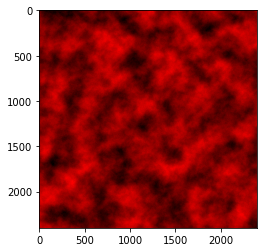

In [41]:
plt.imshow(rgb_img)

6